We explore Cherenkov Radiation for this project. Cherenkov Radiation results from a charged particle that moves with a speed greater than the speed of light **through that particular medium**. i.e.

$v_{par} > \frac{c}{n}$

In astrophysics, this is why the precise direction of the radiation gives us energy measurements! The radiation is a rapid energy-loss mechanism of the charged particle.

We will simulate spectra for Cherenkov radiation under different parameters.

We will assume the Frank-Tamm formula for the frequency spectrum resulting from a charged particle moving relativistically along the $x$ axis in a medium with refraction index $n$. For material on the derivation of this formula see Jackson (EM book) and many online resources. 

Frequency spectrum:

$\frac{dE}{dx} = \frac{q^2 \mu}{4\pi}(1-\frac{1}{\beta^2n^2}) \nu d\nu$

Let's get this in the form of $\nu F_{\nu}$ form. 

We have $\frac{dE}{dx}$ but we want $\nu F_{\nu}$. We note that $dx = \frac{c}{n} dt$ therefore

$\frac{dE}{dx} = \frac{1}{c} \frac{dE}{dt}$

Which is power. $P = \frac{dE}{dt}$

Next we note $P = \frac{4\pi L_\nu}{V}$ where $L_\nu$ is the luminosity at a given $\nu$ and $V$ is the volume. We also note that $L_\nu = F_\nu A$ where $A$ is the area.

Therefore,

$P = \frac{dE}{dt} = \frac{ 4\pi F_\nu A}{V}$

$V=AL$

$P = \frac{dE}{dt} = \frac{ 4\pi F_\nu}{L}$

Where $L$ is the distance travelled by the moving charged particle. This would be an input parameter.

Moving things around, we see that $F_\nu$ becomes

$F_\nu = \frac{L}{4\pi} \bigg[\frac{q^2 \mu}{4\pi}(1-\frac{1}{\beta^2n^2}) \nu d\nu \bigg]$

To get the form we are looking for, we multiply a fancy one to the right hand side, i.e. $\frac{\nu}{\nu}$:
    
$F_\nu = \frac{q^2 \mu \ln(10)}{(4\pi)^2} (1-\frac{1}{\beta^2n^2}) L \nu^2 d(\log(\nu))$

And finally, multiply by one more $\nu$:
    
$\nu F_\nu = A(n) (1-\frac{1}{\beta^2n^2}) L \nu^3 d(\log(\nu))$

with A(n) = \frac{q^2 \mu \ln(10)}{(4\pi)^2}. A is a function of n because $\mu$ is the magnetic permeability and depends on the material of which we propagate through. But since we are interested in only the Earth's atmosphere, we will simplify quite a bit in a moment.

So we see A(n) is just a constant in our simple model because $n=1$ in air, therefore $\mu$ is a determined, unchanging quantity ($\mu = 1.25\times10^{-6} H/m$) and the rest are fundamental constants. So we note that $A(n) = A = 4.666\times10^{-46} \frac{C^2H}{m}$

Now our equation looks like:
    
$\nu F_\nu = A (1-\frac{1}{\beta^2}) L \nu^3 d(\log(\nu))$

where $A$ is known, $\beta$ and $L$ are input parameters, and we plot against some frequency range $[\nu, \nu+d\nu]$

Now let's plot for varying $\beta$s and $L$s. 

Import necessary packages.

In [54]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.integrate as integrate
from scipy.integrate import quad

Define your variables.

In [92]:
# remember beta must be < 1 for Cherenkov radiation to occur.
beta = 1.012
L = 100.0 #in meters because of the \mu constant's dimensions.
A = 4.66e-46 #in C^2*H/m. For n=1.

In [93]:
#Our frequencies logarithmically spaced.
v = np.logspace(22, 26, 10) #in Hz, from 100MeV and goes up to 2TeV.
print v

[1.00000000e+22 2.78255940e+22 7.74263683e+22 2.15443469e+23
 5.99484250e+23 1.66810054e+24 4.64158883e+24 1.29154967e+25
 3.59381366e+25 1.00000000e+26]


Integrate with these values to find $\nu F_\nu$ $y$ points over varying frequency bins.

In [94]:
def integrand(v, beta): 
    return A*L*(1 - 1/(beta**(2)))*(v**(3))

#Integrate over varying frequency bins for several data points.
ans, err = quad(integrand, 2.41e22, 5.0e26, args=(beta,))
print ans
print err

-1.29444444444e+63
1.43712202632e+49


Plot.

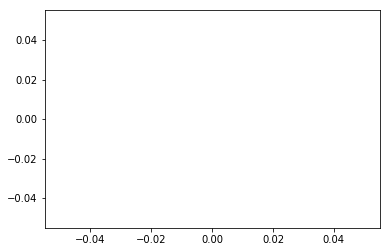

In [88]:
x = v
y = integrand(v,beta)
plt.scatter([x],[y], marker = "+", label = "Cherenkov light for beta=0.75, L=100 m")